In [3]:
library(recommenderlab)

In [4]:
df = read.csv('./Dataset/ratings_Apps_for_Android_cleaned.csv')

In [5]:
df <- subset(df, select = -c(Timestamp) )

In [6]:
head(df)

UserID,ItemId,Rating
A6N0BM3TTTN1W,B004ANMWPY,5
A315MDHWT29JK9,B004ANMWPY,5
A3V4Q4UA42QJXB,B004ANMWPY,5
A1C3BF2HOK1LH2,B004ANMWPY,5
A38VB33FNVD07P,B004ANMWPY,4
A94GCTI3VMYKY,B004ANMWPY,5


In [7]:
# converting the dataframe into realRatingMatrix object which stores the data in sparse format
r<-as(df, "realRatingMatrix")  

In [8]:
r

25233 x 905 rating matrix of class 'realRatingMatrix' with 217843 ratings.

In [9]:
getRatingMatrix(r)

   [[ suppressing 32 column names 'B004ANMWPY', 'B004DLNC4I', 'B004DLPXAO' ... ]]
   [[ suppressing 32 column names 'B004ANMWPY', 'B004DLNC4I', 'B004DLPXAO' ... ]]
   [[ suppressing 32 column names 'B004ANMWPY', 'B004DLNC4I', 'B004DLPXAO' ... ]]


25233 x 905 sparse Matrix of class "dgCMatrix"
                                                                                            
A002359833QJM7OQHCXWY . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
A0038872349TB5N0JHQQW . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
A01024593CWXRU608RV19 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
A01837361LYNLJSD6GKE3 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
A019524626WJQ6Q3E8ZRY . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
A021888930M9DTEV5XH4J . . . . . . . . . . . . . . . . . . . . . . . . . . . . 4 . . . ......
A02270292XRR4GL0CHNH6 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
A02656821OAR4GDOSJA2M . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
A031039837WA119VJ191B . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
A0328927TA7ECTIKNP3G  .

In [10]:
# Recommenders available in recommenderlab package
recommenderRegistry$get_entries(dataType = "realRatingMatrix")

$ALS_realRatingMatrix
Recommender method: ALS for realRatingMatrix
Description: Recommender for explicit ratings based on latent factors, calculated by alternating least squares algorithm.
Reference: Yunhong Zhou, Dennis Wilkinson, Robert Schreiber, Rong Pan (2008). Large-Scale Parallel Collaborative Filtering for the Netflix Prize, 4th Int'l Conf. Algorithmic Aspects in Information and Management, LNCS 5034.
Parameters:
  normalize lambda n_factors n_iterations min_item_nr seed
1      NULL    0.1        10           10           1 NULL

$ALS_implicit_realRatingMatrix
Recommender method: ALS_implicit for realRatingMatrix
Description: Recommender for implicit data based on latent factors, calculated by alternating least squares algorithm.
Reference: Yifan Hu, Yehuda Koren, Chris Volinsky (2008). Collaborative Filtering for Implicit Feedback Datasets, ICDM '08 Proceedings of the 2008 Eighth IEEE International Conference on Data Mining, pages 263-272.
Parameters:
  lambda alpha n_factors 

### Exploring Dataset

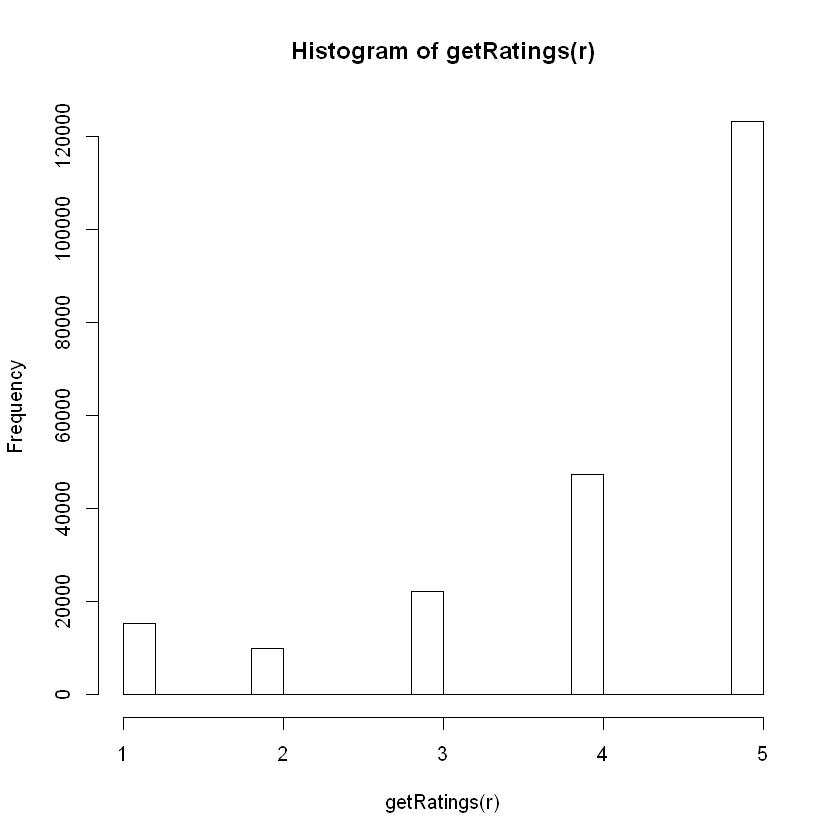

In [11]:
hist(getRatings(r))

We can observe that most of the ratings are 3 and above  
Rating 5 is most frequent

In [12]:
# Number of items rated by first user
rowCounts(r[1,])

A002359833QJM7OQHCXWY 
                   10

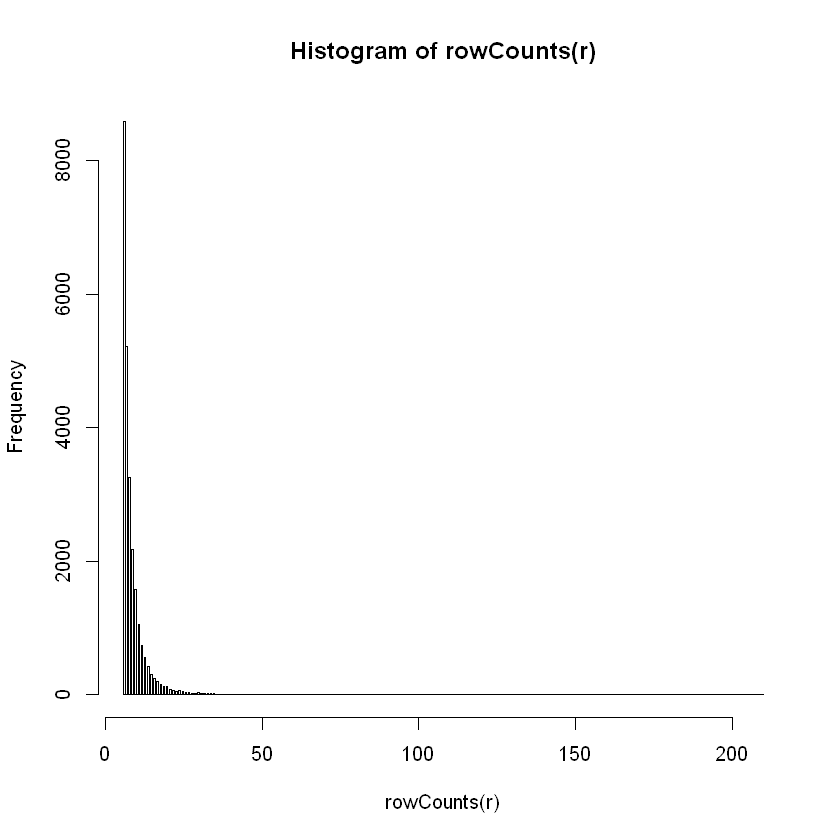

In [13]:
# Distribution of the number of rated items per user 
hist(rowCounts(r), breaks=500)

We can observe that none of the users have rated more than 50 items 

In [14]:
# Avg rating of items by first user
rowMeans(r[1,])

A002359833QJM7OQHCXWY 
                  4.2

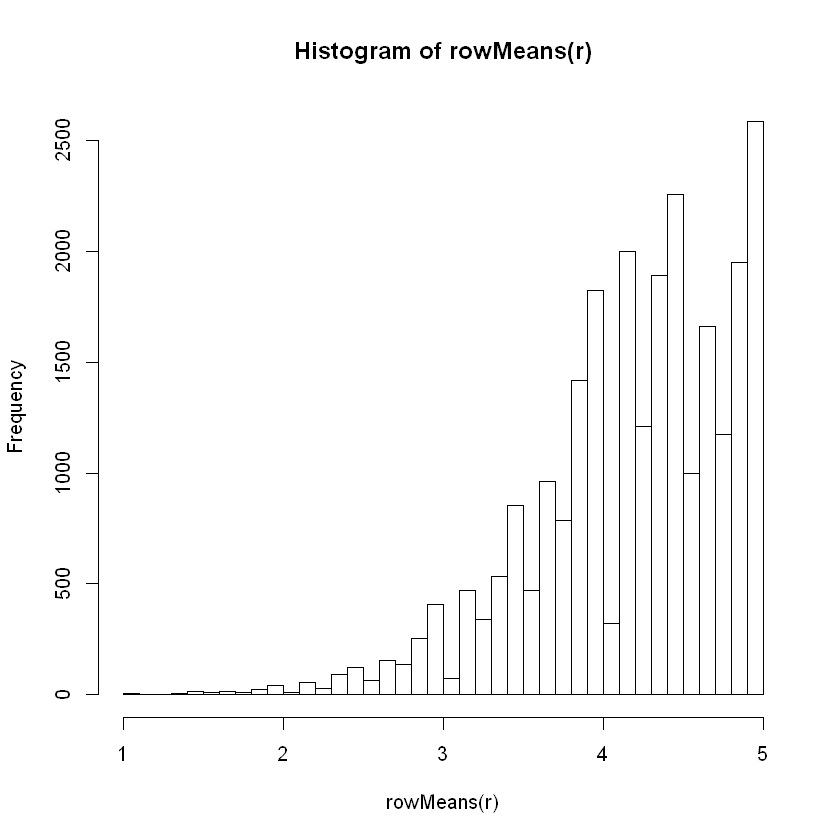

In [15]:
# Distribution of the avg ratings per user
hist(rowMeans(r), breaks=50)

We can observe that avg rating given by most of the users is > = 3

In [16]:
# Avg rating of first item
colMeans(r[,1])

B004ANMWPY 
  3.948276

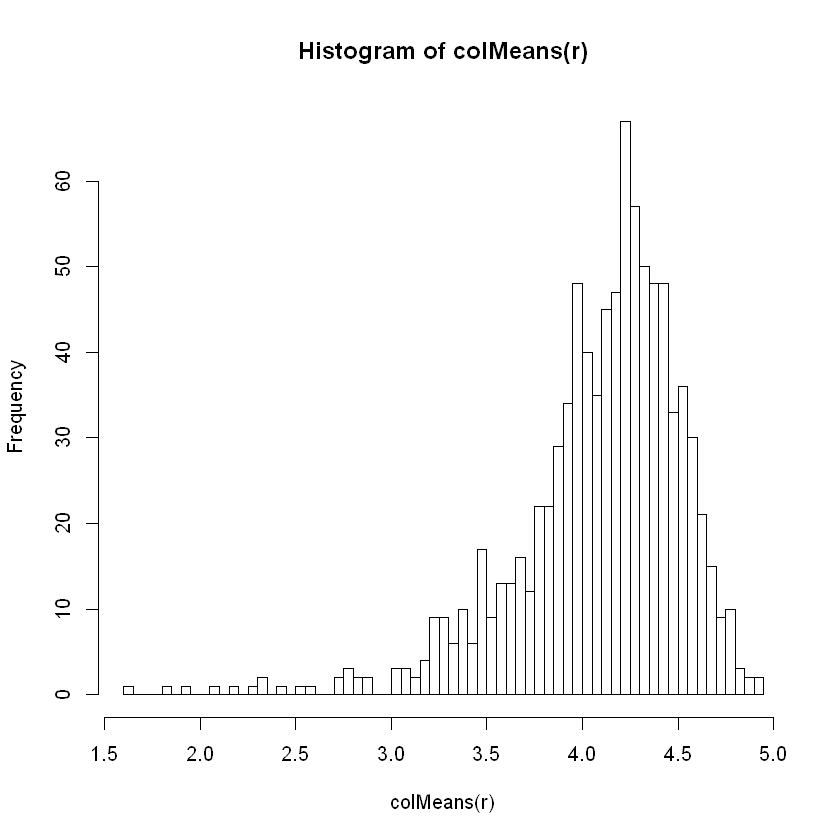

In [17]:
# Distribution of the average ratings per item
hist(colMeans(r), breaks=50)

We can observe that avg rating of most of the items is > = 3

In [18]:
# Number of times first item is rated
colCounts(r[,1])

B004ANMWPY 
       116

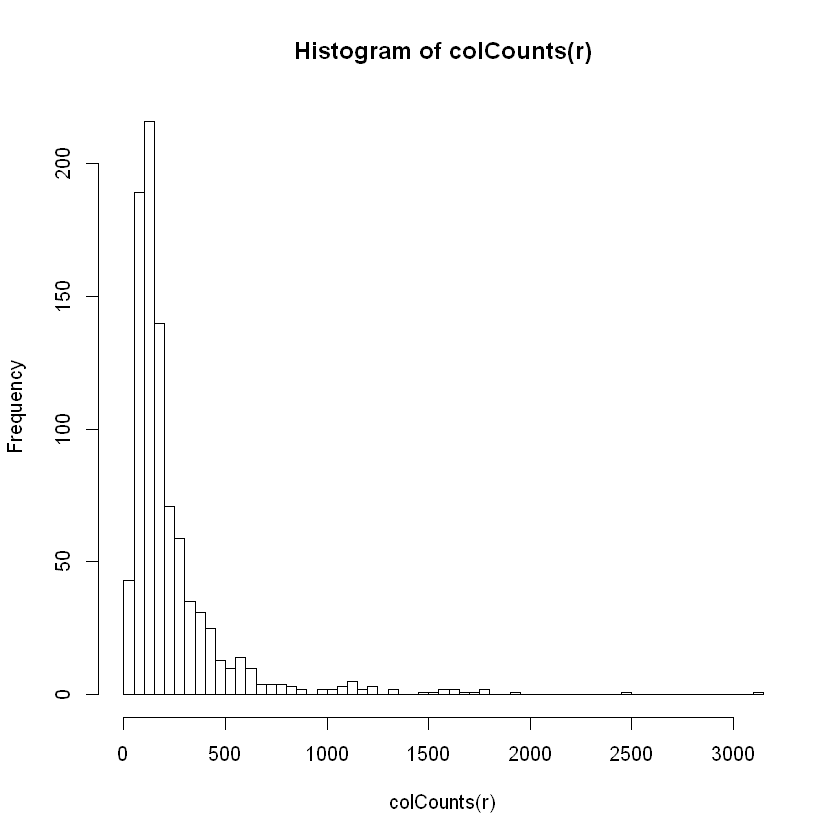

In [19]:
# Distribution of number of times each item is rated
hist(colCounts(r), breaks=100)

We can observe that most of the items are rated less than 500 times

### Inspecting Recommender Algorithms using train/test split

In [20]:
scheme <- evaluationScheme(r[1:20000], method="split", train = 0.7, given=5, goodRating=3)

In [21]:
r1 <- Recommender(getData(scheme, "train"), "UBCF")
r1

Recommender of type 'UBCF' for 'realRatingMatrix' 
learned using 14000 users.

In [22]:
r2 <- Recommender(getData(scheme, "train"), "IBCF")
r2

Recommender of type 'IBCF' for 'realRatingMatrix' 
learned using 14000 users.

In [23]:
r3 <- Recommender(getData(scheme, "train"), "ALS")
r3

Recommender of type 'ALS' for 'realRatingMatrix' 
learned using 14000 users.

In [24]:
r4 <- Recommender(getData(scheme, "train"), "SVDF")
r4

Recommender of type 'SVDF' for 'realRatingMatrix' 
learned using 14000 users.

In [25]:
r5 <- Recommender(getData(scheme, "train"), "Popular")
r5

Recommender of type 'POPULAR' for 'realRatingMatrix' 
learned using 14000 users.

In [26]:
p1 <- predict(r1, getData(scheme, "known"), type="ratings")
p1

6000 x 905 rating matrix of class 'realRatingMatrix' with 5400000 ratings.

In [27]:
p2 <- predict(r2, getData(scheme, "known"), type="ratings")
p2

6000 x 905 rating matrix of class 'realRatingMatrix' with 608367 ratings.

In [28]:
p3 <- predict(r3, getData(scheme, "known"), type="ratings")
p3

6000 x 905 rating matrix of class 'realRatingMatrix' with 5400000 ratings.

In [29]:
p4 <- predict(r4, getData(scheme, "known"), type="ratings")
p4

6000 x 905 rating matrix of class 'realRatingMatrix' with 5400000 ratings.

In [30]:
p5 <- predict(r5, getData(scheme, "known"), type="ratings")
p5

6000 x 905 rating matrix of class 'realRatingMatrix' with 5400000 ratings.

In [31]:
# Calculating prediction accuracy of recommender algorithms using train-test split
error <- rbind(UBCF = calcPredictionAccuracy(p1, getData(scheme, "unknown")), IBCF = calcPredictionAccuracy(p2, getData(scheme, "unknown")), ALS = calcPredictionAccuracy(p3, getData(scheme, "unknown")), SVDF = calcPredictionAccuracy(p4, getData(scheme, "unknown")), Popular = calcPredictionAccuracy(p5, getData(scheme, "unknown")))
error

,RMSE,MSE,MAE
UBCF,1.198101,1.435447,0.8601095
IBCF,1.595287,2.544941,1.0556725
ALS,1.306650,1.707335,1.0041541
SVDF,1.207611,1.458325,0.8525106
Popular,1.156602,1.337727,0.8449016


In [32]:
results1 <- evaluate(scheme, method="IBCF", type = "topNList", n=c(5,10,15,20))
results1

IBCF run fold/sample [model time/prediction time]
	 1  [43.11sec/1.24sec] 


Evaluation results for 1 folds/samples using method 'IBCF'.

In [33]:
getConfusionMatrix(results1)

,TP,FP,FN,TN,precision,recall,TPR,FPR
5,0.02516667,4.135667,3.143500,892.6957,0.006048468,0.007528449,0.007528449,0.004611306
10,0.05366667,8.268000,3.115000,888.5633,0.006449029,0.016763486,0.016763486,0.009218913
15,0.08583333,12.396667,3.082833,884.4347,0.006876293,0.027934118,0.027934118,0.013822412
20,0.12100000,16.522333,3.047667,880.3090,0.007270178,0.039595002,0.039595002,0.018422557


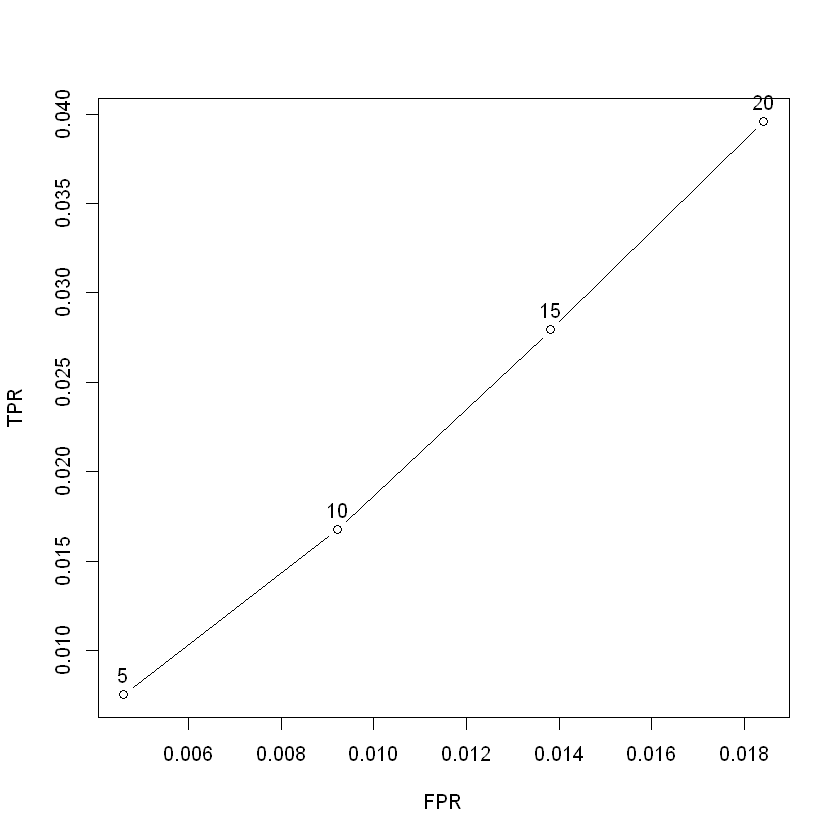

In [34]:
plot(results1, annotate=TRUE)

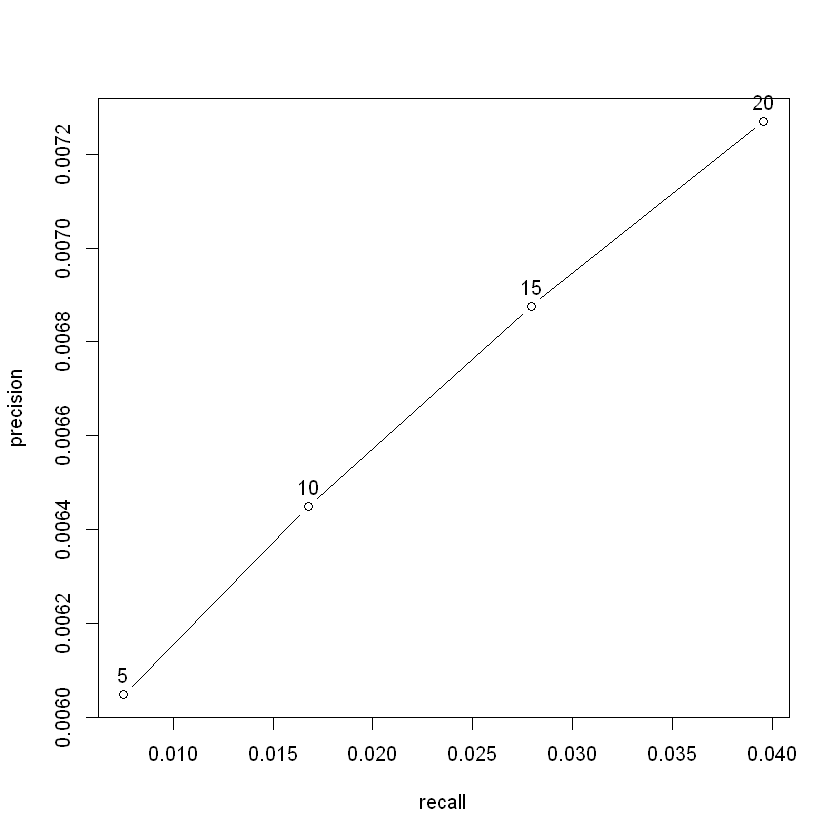

In [35]:
plot(results1, "prec/rec", annotate=TRUE)

In [36]:
results2 <- evaluate(scheme, method="UBCF", type = "topNList", n=c(5,10,15,20))
results2

UBCF run fold/sample [model time/prediction time]
	 1  [0.01sec/313.13sec] 


Evaluation results for 1 folds/samples using method 'UBCF'.

In [37]:
getConfusionMatrix(results2)

,TP,FP,FN,TN,precision,recall,TPR,FPR
5,0.1256667,4.874333,3.043000,891.9570,0.02513333,0.04453049,0.04453049,0.005434585
10,0.1963333,9.803667,2.972333,887.0277,0.01963333,0.06877773,0.06877773,0.010930697
15,0.2528333,14.747167,2.915833,882.0842,0.01685556,0.08831875,0.08831875,0.016442701
20,0.3055000,19.694500,2.863167,877.1368,0.01527500,0.10651704,0.10651704,0.021959008


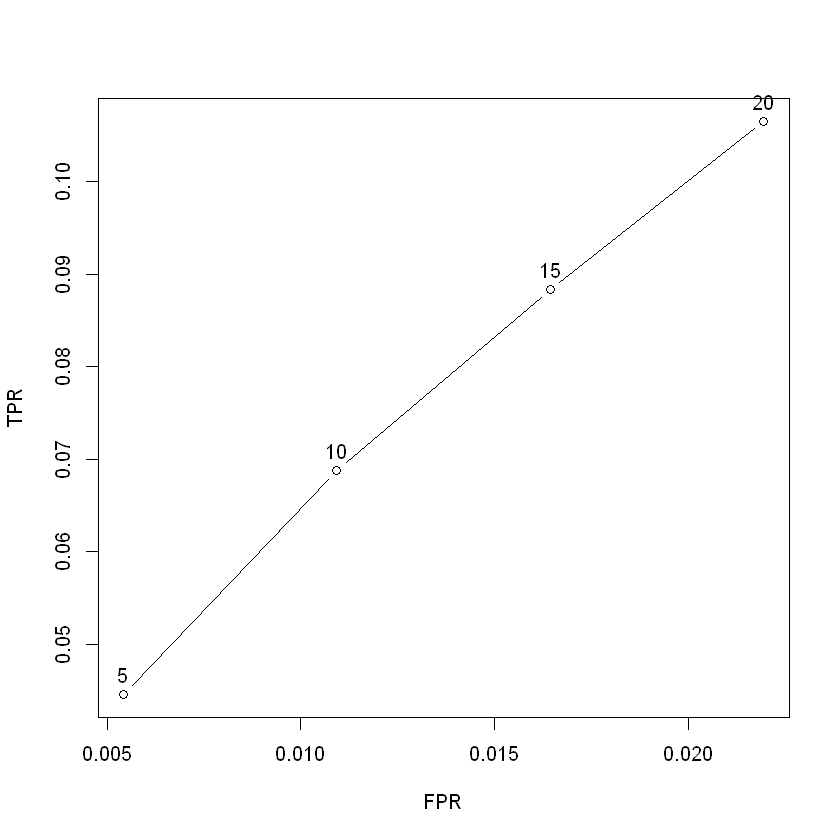

In [38]:
plot(results2, annotate=TRUE)

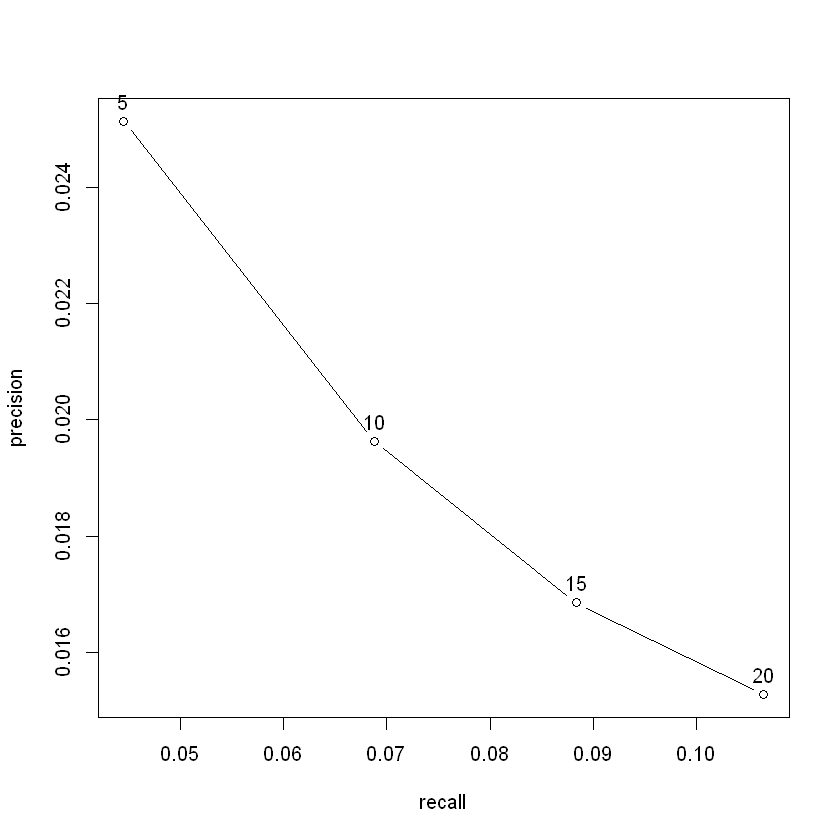

In [39]:
plot(results2, "prec/rec", annotate=TRUE)

In [40]:
results3 <- evaluate(scheme, method="ALS", type = "topNList", n=c(5,10,15,20))
results3

ALS run fold/sample [model time/prediction time]
	 1  [0sec/400.85sec] 


Evaluation results for 1 folds/samples using method 'ALS'.

In [41]:
getConfusionMatrix(results3)

,TP,FP,FN,TN,precision,recall,TPR,FPR
5,0.02016667,4.979833,3.148500,891.8515,0.004033333,0.007085975,0.007085975,0.005552706
10,0.03900000,9.961000,3.129667,886.8703,0.003900000,0.012624818,0.012624818,0.011106818
15,0.05850000,14.941500,3.110167,881.8898,0.003900000,0.019317954,0.019317954,0.016660260
20,0.07650000,19.923500,3.092167,876.9078,0.003825000,0.024686049,0.024686049,0.022215347


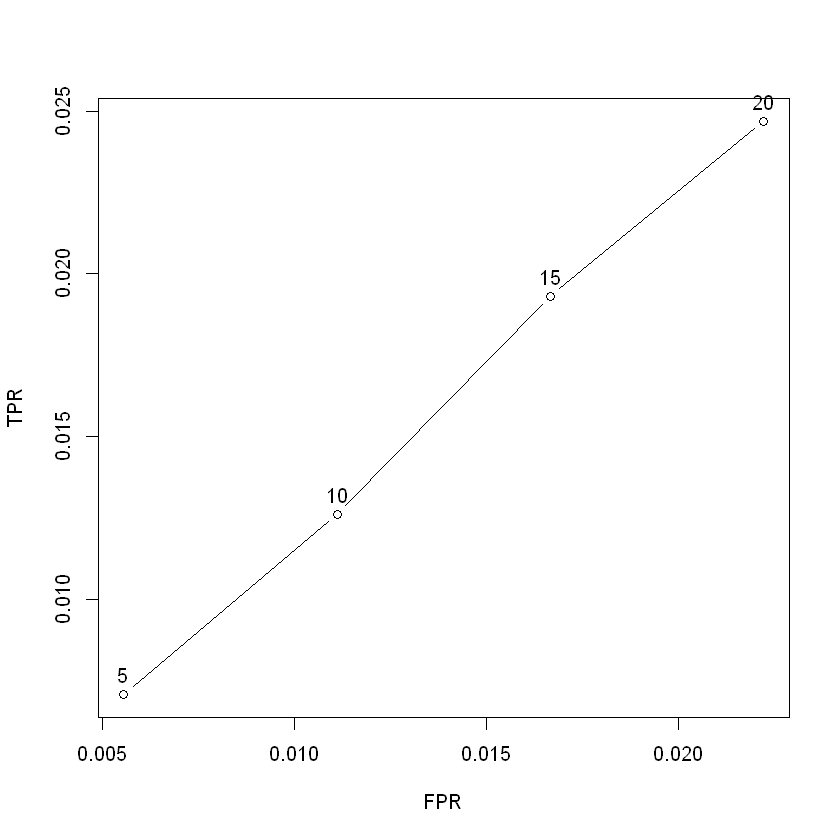

In [42]:
plot(results3, annotate=TRUE)

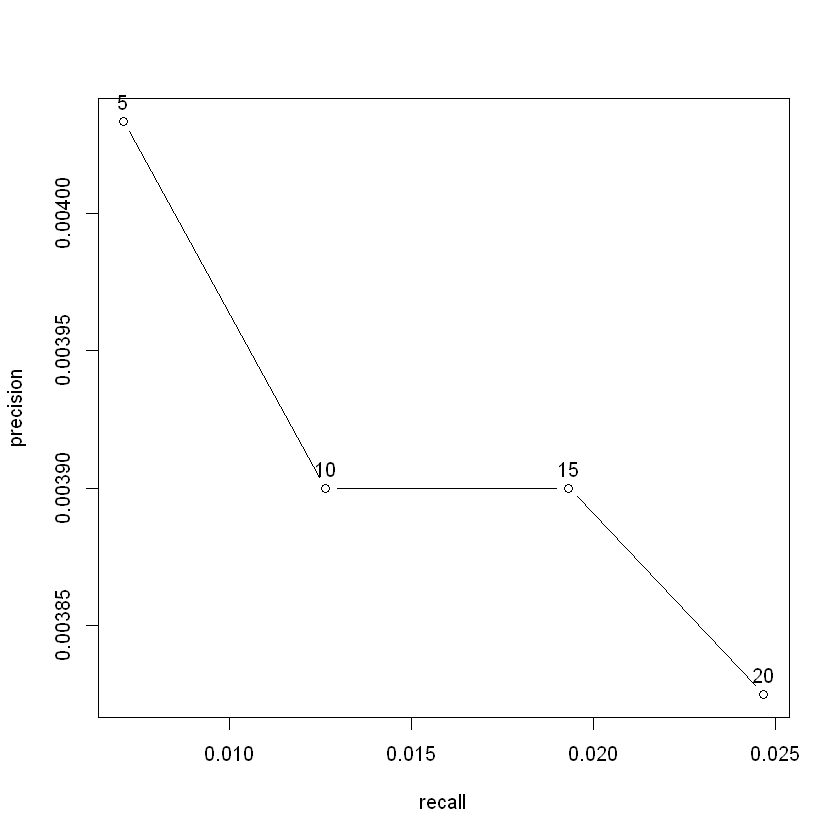

In [43]:
plot(results3, "prec/rec", annotate=TRUE)

In [44]:
results4 <- evaluate(scheme, method="SVDF", type = "topNList", n=c(5,10,15,20))
results4

SVDF run fold/sample [model time/prediction time]
	 1  [317.55sec/77.77sec] 


Evaluation results for 1 folds/samples using method 'SVDF'.

In [45]:
getConfusionMatrix(results4)

,TP,FP,FN,TN,precision,recall,TPR,FPR
5,0.06116667,4.938833,3.107500,891.8925,0.012233333,0.01947656,0.01947656,0.005506718
10,0.09733333,9.902667,3.071333,886.9287,0.009733333,0.03199815,0.03199815,0.011041486
15,0.12950000,14.870500,3.039167,881.9608,0.008633333,0.04157494,0.04157494,0.016580662
20,0.15800000,19.842000,3.010667,876.9893,0.007900000,0.05092369,0.05092369,0.022123982


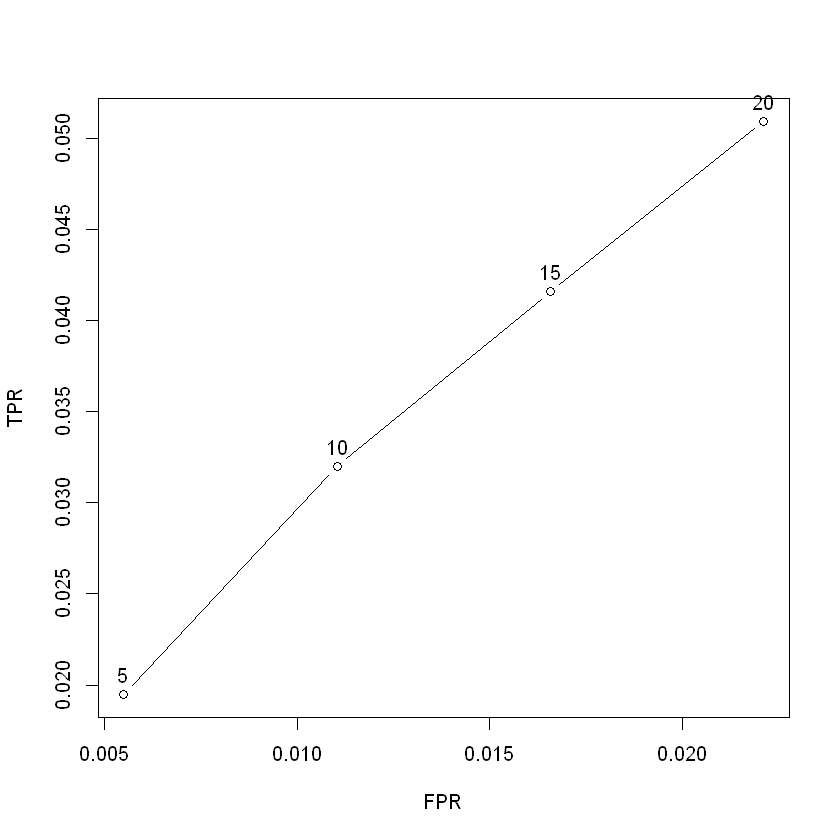

In [46]:
plot(results4, annotate=TRUE)

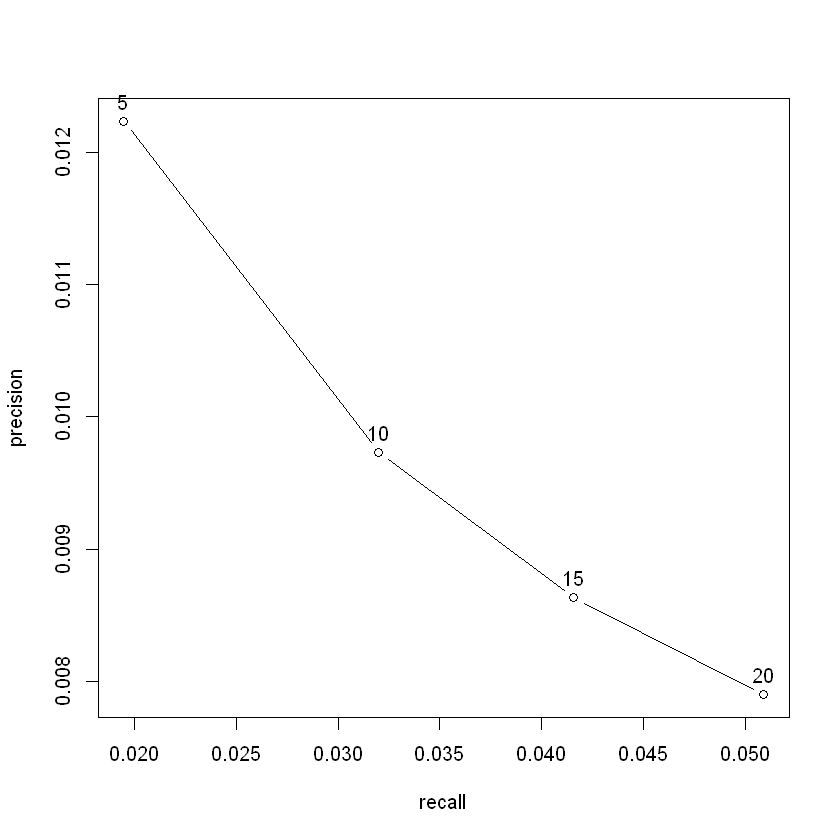

In [47]:
plot(results4, "prec/rec", annotate=TRUE)

In [48]:
results5 <- evaluate(scheme, method="Popular", type = "topNList", n=c(5,10,15,20))
results5

Popular run fold/sample [model time/prediction time]
	 1  [0.01sec/101.02sec] 


Evaluation results for 1 folds/samples using method 'POPULAR'.

In [49]:
getConfusionMatrix(results5)

,TP,FP,FN,TN,precision,recall,TPR,FPR
5,0.1481667,4.851833,3.020500,891.9795,0.02963333,0.0512048,0.0512048,0.005409384
10,0.2570000,9.743000,2.911667,887.0883,0.02570000,0.0865153,0.0865153,0.010862731
15,0.3451667,14.654833,2.823500,882.1765,0.02301111,0.1156288,0.1156288,0.016339273
20,0.4250000,19.575000,2.743667,877.2563,0.02125000,0.1419541,0.1419541,0.021825098


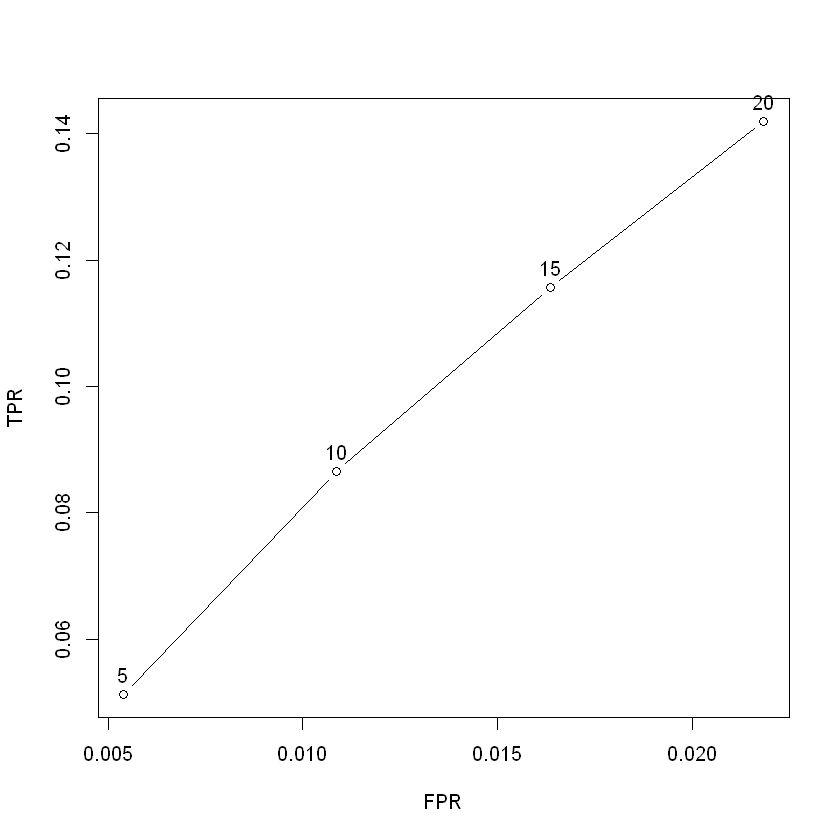

In [50]:
plot(results5, annotate=TRUE)

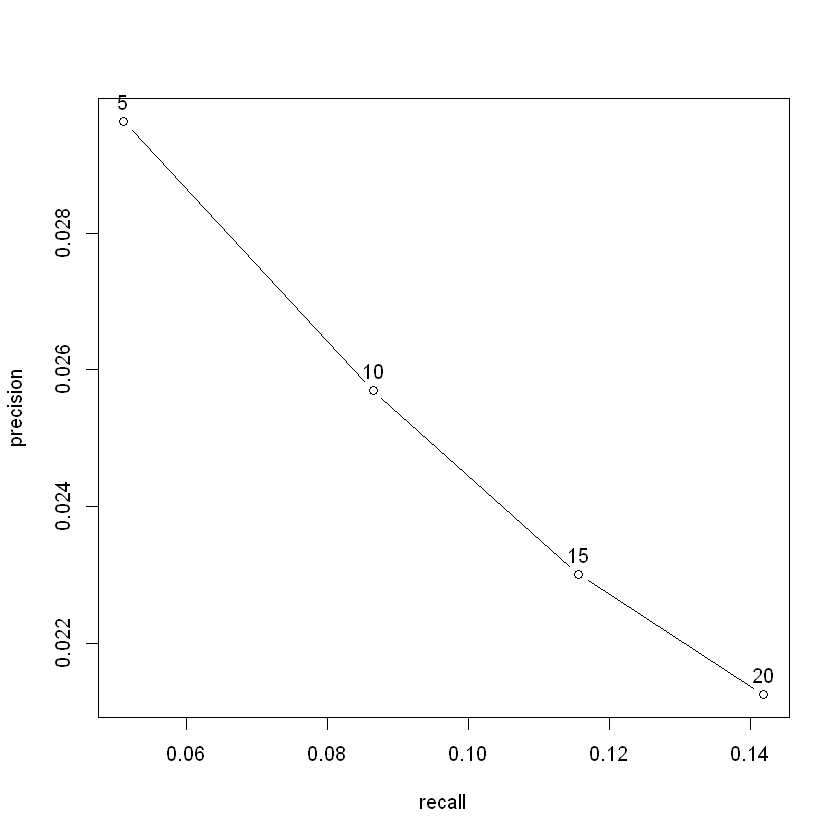

In [51]:
plot(results5, "prec/rec", annotate=TRUE)

### Comparing and Selecting Recommender Algorithms using cross-validation

In [52]:
# Using cross-validation to compare recommender performance
scheme <- evaluationScheme(r[1:20000], method="cross", k = 4, given=5, goodRating=3)
scheme

Evaluation scheme with 5 items given
Method: 'cross-validation' with 4 run(s).
Good ratings: >=3.000000
Data set: 20000 x 905 rating matrix of class 'realRatingMatrix' with 172305 ratings.

In [53]:
algorithms <- list("popular items" = list(name="POPULAR", param=NULL), "user-based CF" = list(name="UBCF", param=NULL), "item-based CF" = list(name="IBCF", param=NULL), "ALS" = list(name="ALS", param=NULL),"funk SVD" = list(name="SVDF", param=NULL)) 

In [54]:
# Calculating prediction accuracy of all recommenders
rating_results <- evaluate(scheme, algorithms, type = "ratings")
rating_results

POPULAR run fold/sample [model time/prediction time]
	 1  [0.02sec/0.65sec] 
	 2  [0.01sec/0.81sec] 
	 3  [0.02sec/0.72sec] 
	 4  [0.01sec/0.74sec] 
UBCF run fold/sample [model time/prediction time]
	 1  [0.01sec/269.61sec] 
	 2  [0.02sec/268.99sec] 
	 3  [0.01sec/268.78sec] 
	 4  [0sec/269.96sec] 
IBCF run fold/sample [model time/prediction time]
	 1  [47.08sec/0.42sec] 
	 2  [46.72sec/0.42sec] 
	 3  [46.84sec/0.47sec] 
	 4  [46.88sec/0.42sec] 
ALS run fold/sample [model time/prediction time]
	 1  [0sec/400.42sec] 
	 2  [0sec/397.49sec] 
	 3  [0sec/399.74sec] 
	 4  [0sec/398.39sec] 
SVDF run fold/sample [model time/prediction time]
	 1  [309.72sec/61.99sec] 
	 2  [310.6sec/60.73sec] 
	 3  [317.53sec/58.55sec] 
	 4  [325.9sec/60.11sec] 


List of evaluation results for 5 recommenders:
Evaluation results for 4 folds/samples using method 'POPULAR'.
Evaluation results for 4 folds/samples using method 'UBCF'.
Evaluation results for 4 folds/samples using method 'IBCF'.
Evaluation results for 4 folds/samples using method 'ALS'.
Evaluation results for 4 folds/samples using method 'SVDF'.

In [55]:
names(rating_results)

[1] "popular items" "user-based CF" "item-based CF" "ALS"          
[5] "funk SVD"

In [56]:
rating_results[[1]]

Evaluation results for 4 folds/samples using method 'POPULAR'.

In [57]:
show(rating_results)

List of evaluation results for 5 recommenders:
Evaluation results for 4 folds/samples using method 'POPULAR'.
Evaluation results for 4 folds/samples using method 'UBCF'.
Evaluation results for 4 folds/samples using method 'IBCF'.
Evaluation results for 4 folds/samples using method 'ALS'.
Evaluation results for 4 folds/samples using method 'SVDF'.


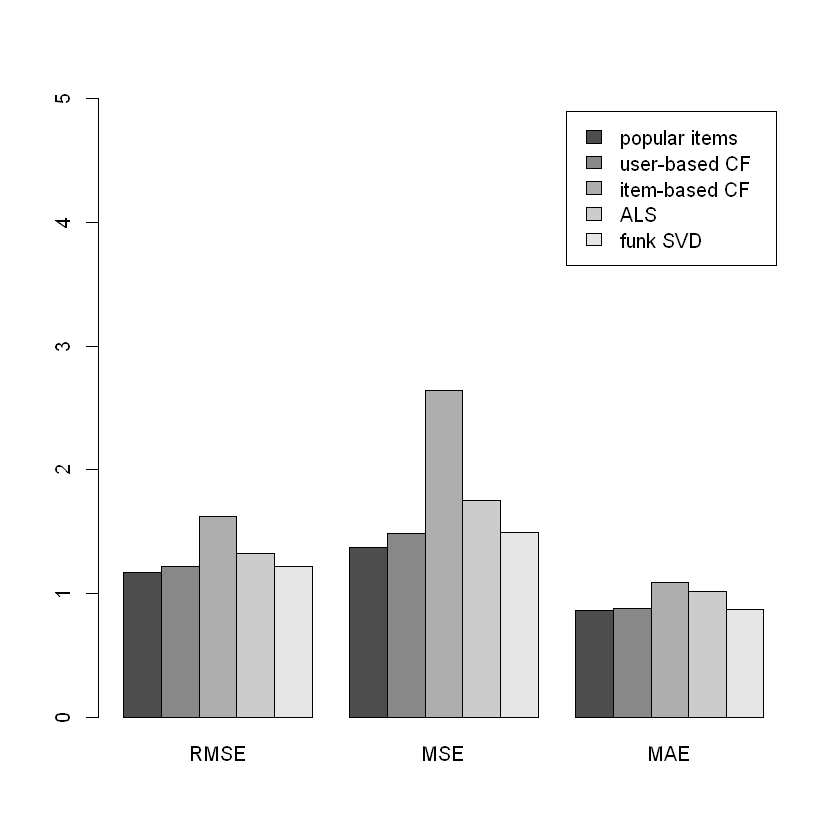

In [58]:
# Comparison of prediction accuracy of all recommenders
plot(rating_results, ylim = c(0,5))

In [59]:
# Calculating TPR, FPR, Precision and Recall of all recommenders
top_results <- evaluate(scheme, algorithms, type = "topNList", n=c(5, 10, 15, 20))
top_results

POPULAR run fold/sample [model time/prediction time]
	 1  [0sec/70.58sec] 
	 2  [0.02sec/71.58sec] 
	 3  [0.02sec/70.89sec] 
	 4  [0.01sec/71.11sec] 
UBCF run fold/sample [model time/prediction time]
	 1  [0.02sec/278.52sec] 
	 2  [0sec/272.84sec] 
	 3  [0sec/273.99sec] 
	 4  [0.01sec/287.28sec] 
IBCF run fold/sample [model time/prediction time]
	 1  [51.22sec/1.16sec] 
	 2  [52.01sec/1.23sec] 
	 3  [55.78sec/1.54sec] 
	 4  [51.96sec/1.16sec] 
ALS run fold/sample [model time/prediction time]
	 1  [0sec/451.97sec] 
	 2  [0sec/456.66sec] 
	 3  [0sec/431.36sec] 
	 4  [0sec/431.06sec] 
SVDF run fold/sample [model time/prediction time]
	 1  [345.31sec/65.72sec] 
	 2  [343.72sec/66.54sec] 
	 3  [341.75sec/64.79sec] 
	 4  [342.75sec/65.35sec] 


List of evaluation results for 5 recommenders:
Evaluation results for 4 folds/samples using method 'POPULAR'.
Evaluation results for 4 folds/samples using method 'UBCF'.
Evaluation results for 4 folds/samples using method 'IBCF'.
Evaluation results for 4 folds/samples using method 'ALS'.
Evaluation results for 4 folds/samples using method 'SVDF'.

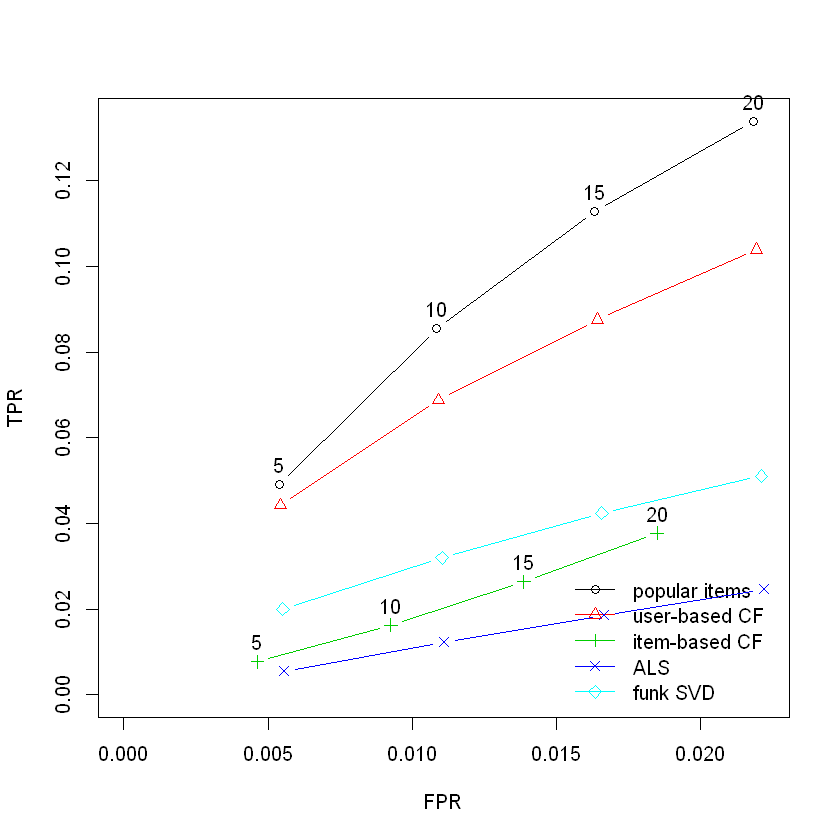

In [60]:
# Comparison of all recommenders using ROC
plot(top_results, annotate=c(1,3), legend="bottomright")

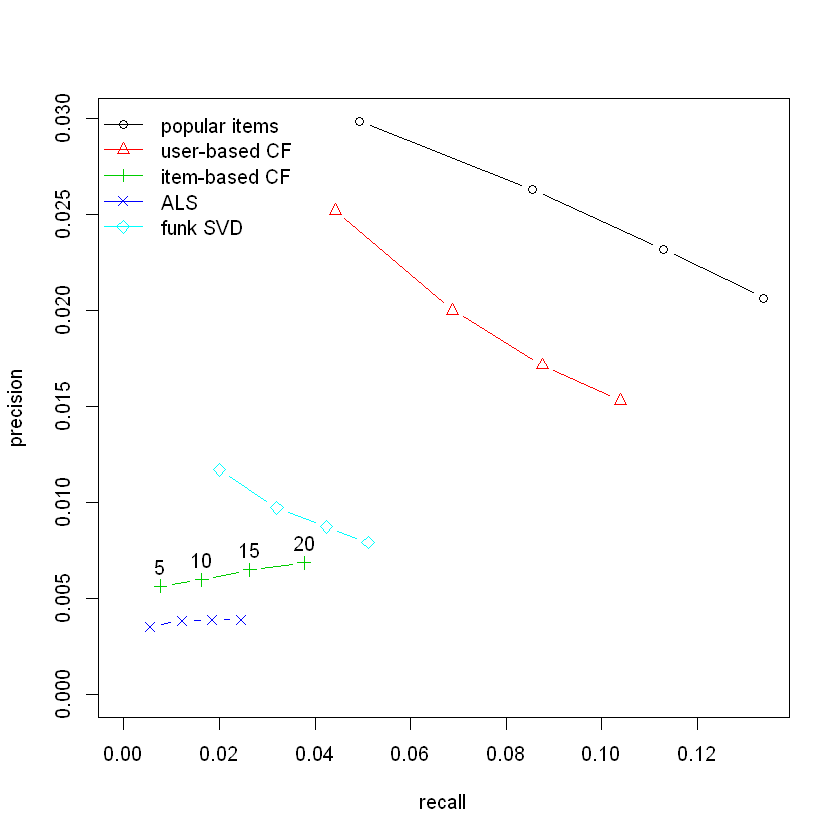

In [61]:
# Comparison of all recommenders using Precision-Recall curve
plot(top_results, "prec/rec", annotate=3, legend="topleft")

### Hybrid Recommendation System

In [62]:
# Creating the hybrid recommender
scheme <- evaluationScheme(r[1:20000], method="split", train = 0.7, given=5, goodRating=3)
hybrid_recom <- HybridRecommender(Recommender(getData(scheme, "train"), method = "UBCF"), Recommender(getData(scheme, "train"), method = "SVDF"), Recommender(getData(scheme, "train"), method = "Popular"), weights = c(.3,.3,.4))

In [63]:
hybrid_recom

Recommender of type 'HYBRID' for 'ratingMatrix' 
learned using NA users.

In [64]:
getModel(hybrid_recom)

$recommender
$recommender[[1]]
Recommender of type 'UBCF' for 'realRatingMatrix' 
learned using 14000 users.

$recommender[[2]]
Recommender of type 'SVDF' for 'realRatingMatrix' 
learned using 14000 users.

$recommender[[3]]
Recommender of type 'POPULAR' for 'realRatingMatrix' 
learned using 14000 users.


$weights
[1] 0.3 0.3 0.4


In [65]:
pred <- predict(hybrid_recom, getData(scheme, "known"), type="ratings")

In [66]:
# Calculating accuracy of hybrid recommender
calcPredictionAccuracy(pred, getData(scheme, "unknown"))

RMSE       MSE       MAE 
1.1698883 1.3686387 0.8492885

In [67]:
# Recommending top 5 items to 10 users
test<-r[20001:20010]
as(predict(hybrid_recom, test, n=5), "list")

[[1]]
[1] "B008IJT0CE" "B004JJR2K4" "B009EEFTMC" "B006OOHYIC" "B006D1ONE4"

[[2]]
[1] "B004JJR2K4" "B005YH5R7A" "B008IJT0CE" "B009EEFTMC" "B006OOHYIC"

[[3]]
[1] "B004JJR2K4" "B005YH5R7A" "B008IJT0CE" "B009EEFTMC" "B006OOHYIC"

[[4]]
[1] "B004JJR2K4" "B0086700CM" "B005YH5R7A" "B0054JZC6E" "B005V1N71W"

[[5]]
[1] "B004JJR2K4" "B005YH5R7A" "B009EEFTMC" "B008IJT0CE" "B006OOHYIC"

[[6]]
[1] "B004JJR2K4" "B005YH5R7A" "B008IJT0CE" "B006OOHYIC" "B00FEIX5OG"

[[7]]
[1] "B004JJR2K4" "B005YH5R7A" "B008IJT0CE" "B006OOHYIC" "B00FEIX5OG"

[[8]]
[1] "B004JJR2K4" "B005YH5R7A" "B009EEFTMC" "B008IJT0CE" "B006OOHYIC"

[[9]]
[1] "B004JJR2K4" "B005YH5R7A" "B0064X7B4A" "B005ZXWMUS" "B00FN811SY"

[[10]]
[1] "B004JJR2K4" "B005YH5R7A" "B009HKL4B8" "B0094BB4TW" "B0064X7FVE"